In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
model = DecisionTreeClassifier()

In [3]:
df = pd.read_csv("C:\practice_data_set\wineQualityReds.csv")
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         1599 non-null   float64
 1   volatile.acidity      1599 non-null   float64
 2   citric.acid           1599 non-null   float64
 3   residual.sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free.sulfur.dioxide   1599 non-null   float64
 6   total.sulfur.dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.shape

(1599, 12)

In [6]:
df.isnull().sum()

fixed.acidity           0
volatile.acidity        0
citric.acid             0
residual.sugar          0
chlorides               0
free.sulfur.dioxide     0
total.sulfur.dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [9]:
l = []
for i in df['quality']:
    if i == 5:
        l.append(i)

In [10]:
len(l)

681

In [11]:
df['quality'].nunique()

6

In [12]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [13]:
df.duplicated().sum()

240

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
X = df.drop('quality',axis=1)
y = df.quality

In [17]:
X.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


In [18]:
y.head()

0    5
1    5
2    5
3    6
5    5
Name: quality, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
X_train.shape

(1087, 11)

In [21]:
X_test.shape

(272, 11)

In [22]:
model = DecisionTreeClassifier()

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
model.score(X_test,y_test)

0.49264705882352944

[Text(0.47443708528493367, 0.9722222222222222, 'x[10] <= 10.25\ngini = 0.648\nsamples = 1087\nvalue = [6, 42, 457, 432, 136, 14]'),
 Text(0.3160982630757221, 0.9166666666666666, 'x[6] <= 98.5\ngini = 0.534\nsamples = 575\nvalue = [5, 26, 351, 173, 18, 2]'),
 Text(0.20206381733021078, 0.8611111111111112, 'x[1] <= 0.548\ngini = 0.568\nsamples = 495\nvalue = [5, 25, 277, 168, 18, 2]'),
 Text(0.08238192818110851, 0.8055555555555556, 'x[9] <= 0.585\ngini = 0.594\nsamples = 220\nvalue = [1, 7, 96, 101, 13, 2]'),
 Text(0.02810304449648712, 0.75, 'x[10] <= 9.75\ngini = 0.516\nsamples = 73\nvalue = [0, 4, 44, 25, 0, 0]'),
 Text(0.01873536299765808, 0.6944444444444444, 'x[7] <= 0.997\ngini = 0.398\nsamples = 47\nvalue = [0, 2, 35, 10, 0, 0]'),
 Text(0.01249024199843872, 0.6388888888888888, 'x[5] <= 26.5\ngini = 0.509\nsamples = 25\nvalue = [0, 1, 15, 9, 0, 0]'),
 Text(0.00936768149882904, 0.5833333333333334, 'x[3] <= 2.35\ngini = 0.431\nsamples = 21\nvalue = [0, 1, 15, 5, 0, 0]'),
 Text(0.006245

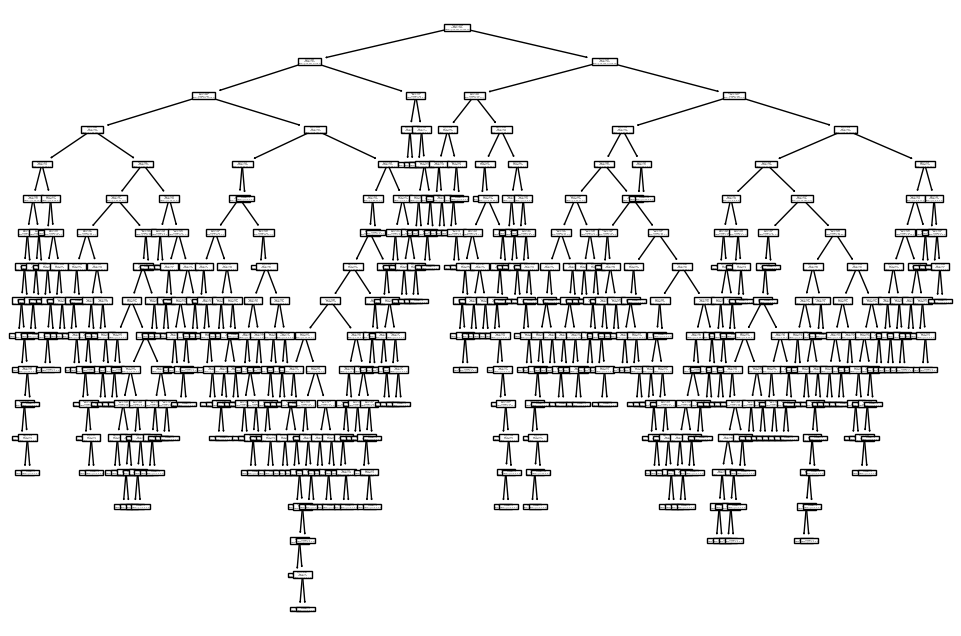

In [25]:
from sklearn import tree
fig = plt.figure(figsize=(12,8))
tree.plot_tree(model)

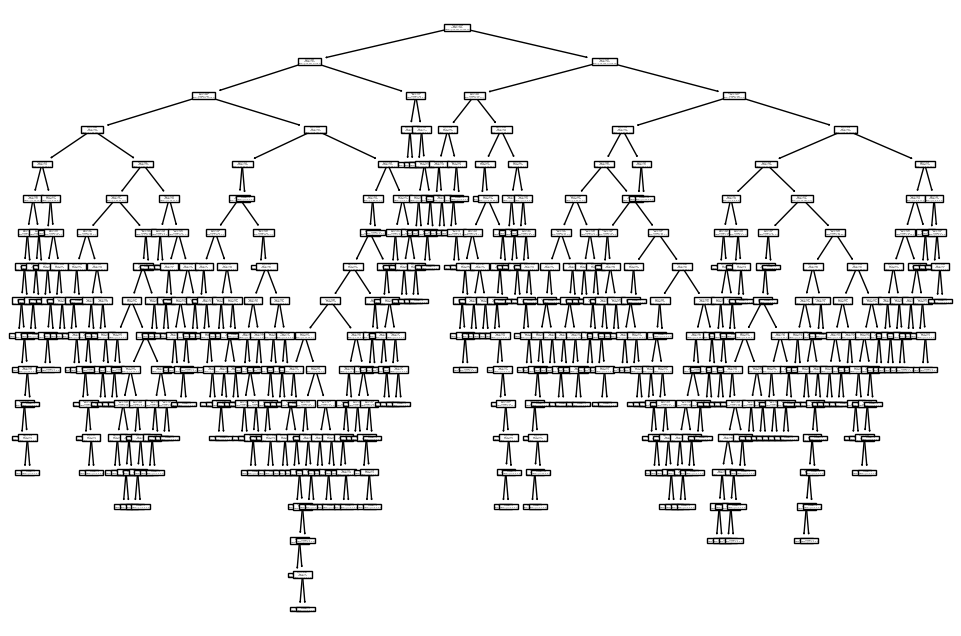

In [26]:
from sklearn import tree
fig = plt.figure(figsize=(12,8))
tree.plot_tree(model)
plt.show()

In [27]:
from sklearn.ensemble import AdaBoostClassifier

In [28]:
boost = AdaBoostClassifier()
boost.fit(X_train,y_train)
boost.score(X_test,y_test)

0.5477941176470589

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
model = GradientBoostingClassifier()

In [31]:
model.fit(X_train,y_train)

GradientBoostingClassifier()

In [32]:
model.score(X_test,y_test)

0.625

In [33]:
import xgboost

In [34]:
# if you can work with xgboost then we have output in sequentially / indexing then it work , so first it convert

In [35]:
df['quality'] = df['quality'].replace({3:0,4:1,5:2,6:3,7:4,8:5})

In [36]:
df.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,2


In [37]:
df['quality'].unique()

array([2, 3, 4, 1, 5, 0], dtype=int64)

In [38]:
boost = xgboost.XGBClassifier()

In [39]:
X = df.drop('quality',axis=1)
y = df.quality

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
boost.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [42]:
boost.score(X_train,y_train)

1.0